In [1]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('C:/Pythondatasets/Banja Luka/Dataset_BanjaLuka_Sa_Diskretnim_Vremenom.csv', parse_dates=True, index_col='Date (LT)')
data

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,diskretno_vrijeme
Date (LT),,,,,,,,,,,,,,
2021-09-08 20:00:00,Banja Luka,PM2.5 - Principal,2021,9,8,20,10.4,43,Good,11.5,UG/M3,1 Hr,Valid,0.0
2021-09-08 21:00:00,Banja Luka,PM2.5 - Principal,2021,9,8,21,11.8,49,Good,13.2,UG/M3,1 Hr,Valid,1.0
2021-09-08 22:00:00,Banja Luka,PM2.5 - Principal,2021,9,8,22,16.0,59,Moderate,19.4,UG/M3,1 Hr,Valid,2.0
2021-09-08 23:00:00,Banja Luka,PM2.5 - Principal,2021,9,8,23,17.5,62,Moderate,19.0,UG/M3,1 Hr,Valid,3.0
2021-09-09 00:00:00,Banja Luka,PM2.5 - Principal,2021,9,9,0,17.2,62,Moderate,16.8,UG/M3,1 Hr,Valid,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13 21:00:00,Banja Luka,PM2.5 - Principal,2023,6,13,21,6.8,28,Good,6.9,UG/M3,1 Hr,Valid,14016.0
2023-06-13 22:00:00,Banja Luka,PM2.5 - Principal,2023,6,13,22,7.0,29,Good,7.2,UG/M3,1 Hr,Valid,14017.0
2023-06-13 23:00:00,Banja Luka,PM2.5 - Principal,2023,6,13,23,8.3,35,Good,9.7,UG/M3,1 Hr,Valid,14018.0


In [3]:
series = data['AQI'].squeeze()
series

Date (LT)
2021-09-08 20:00:00    43
2021-09-08 21:00:00    49
2021-09-08 22:00:00    59
2021-09-08 23:00:00    62
2021-09-09 00:00:00    62
                       ..
2023-06-13 21:00:00    28
2023-06-13 22:00:00    29
2023-06-13 23:00:00    35
2023-06-14 00:00:00    35
2023-06-14 01:00:00    37
Name: AQI, Length: 14021, dtype: int64

In [4]:
X = series
size = int(len(X)* 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [5]:
# walk-forward validation
for t in range(len(test)):
    # define model configuration
    my_order, my_seasonal_order, trend = [(0, 1, 0), (2, 1, 0, 12), 'n']
    #my_seasonal_order = (1, 1, 1, 12)
    # define model
    model = SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order, trend=trend)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=89.773963, expected=93.000000
predicted=90.564478, expected=107.000000
predicted=117.376351, expected=122.000000
predicted=130.026726, expected=126.000000
predicted=125.640801, expected=113.000000
predicted=113.869188, expected=96.000000
predicted=97.347686, expected=83.000000
predicted=82.961641, expected=74.000000
predicted=73.352453, expected=69.000000
predicted=60.873789, expected=75.000000
predicted=68.981543, expected=87.000000
predicted=89.445206, expected=171.000000
predicted=185.249534, expected=174.000000
predicted=169.612903, expected=183.000000
predicted=202.756230, expected=182.000000
predicted=209.430368, expected=189.000000
predicted=184.088062, expected=186.000000
predicted=182.052231, expected=178.000000
predicted=173.958991, expected=183.000000
predicted=178.671302, expected=188.000000
predicted=185.868919, expected=180.000000
predicted=165.009615, expected=165.000000
predicted=155.333592, expected=156.000000
predicted=171.500171, expected=151.000000
predict

predicted=119.564307, expected=143.000000
predicted=128.329673, expected=153.000000
predicted=168.666129, expected=166.000000
predicted=171.402401, expected=169.000000
predicted=178.852184, expected=157.000000
predicted=157.522094, expected=155.000000
predicted=160.278336, expected=148.000000
predicted=160.825016, expected=119.000000
predicted=141.633941, expected=97.000000
predicted=89.065451, expected=75.000000
predicted=75.997311, expected=61.000000
predicted=47.820948, expected=67.000000
predicted=78.048085, expected=57.000000
predicted=43.563666, expected=45.000000
predicted=45.749616, expected=38.000000
predicted=33.236706, expected=41.000000
predicted=37.052481, expected=41.000000
predicted=37.365568, expected=48.000000
predicted=46.455687, expected=61.000000
predicted=59.037880, expected=65.000000
predicted=68.977547, expected=67.000000
predicted=54.892343, expected=62.000000
predicted=59.066650, expected=58.000000
predicted=37.394880, expected=59.000000
predicted=72.518272, ex

predicted=153.337479, expected=166.000000
predicted=162.623201, expected=157.000000
predicted=164.306062, expected=157.000000
predicted=153.192401, expected=156.000000
predicted=150.808534, expected=140.000000
predicted=155.261600, expected=118.000000
predicted=129.107657, expected=114.000000
predicted=134.255665, expected=123.000000
predicted=144.117461, expected=100.000000
predicted=109.205455, expected=83.000000
predicted=58.642786, expected=140.000000
predicted=138.525960, expected=125.000000
predicted=121.594525, expected=95.000000
predicted=77.615681, expected=83.000000
predicted=95.771542, expected=97.000000
predicted=99.405819, expected=95.000000
predicted=86.078089, expected=96.000000
predicted=109.293703, expected=105.000000
predicted=130.035737, expected=99.000000
predicted=114.814878, expected=99.000000
predicted=119.027392, expected=106.000000
predicted=107.240421, expected=145.000000
predicted=124.139184, expected=124.000000
predicted=106.482020, expected=117.000000
predi

predicted=178.033956, expected=180.000000
predicted=182.479498, expected=180.000000
predicted=179.352978, expected=181.000000
predicted=173.220897, expected=180.000000
predicted=172.449376, expected=167.000000
predicted=160.086493, expected=160.000000
predicted=163.325021, expected=163.000000
predicted=165.641053, expected=160.000000
predicted=169.739023, expected=169.000000
predicted=184.228275, expected=174.000000
predicted=176.382775, expected=160.000000
predicted=160.771811, expected=139.000000
predicted=139.545133, expected=106.000000
predicted=110.387007, expected=94.000000
predicted=94.868304, expected=92.000000
predicted=90.019802, expected=89.000000
predicted=83.771688, expected=91.000000
predicted=87.516874, expected=97.000000
predicted=99.129904, expected=101.000000
predicted=103.425326, expected=102.000000
predicted=109.427998, expected=103.000000
predicted=110.148886, expected=107.000000
predicted=105.758350, expected=100.000000
predicted=96.598056, expected=94.000000
pred

predicted=166.392951, expected=169.000000
predicted=154.963914, expected=166.000000
predicted=157.764425, expected=164.000000
predicted=159.060117, expected=165.000000
predicted=165.414562, expected=171.000000
predicted=167.667199, expected=184.000000
predicted=185.044435, expected=187.000000
predicted=186.185047, expected=179.000000
predicted=178.770452, expected=179.000000
predicted=193.084223, expected=171.000000
predicted=189.237098, expected=167.000000
predicted=170.895516, expected=172.000000
predicted=168.603742, expected=173.000000
predicted=167.572266, expected=180.000000
predicted=177.265886, expected=177.000000
predicted=175.758677, expected=173.000000
predicted=174.245240, expected=172.000000
predicted=173.430460, expected=171.000000
predicted=172.583496, expected=169.000000
predicted=166.350855, expected=163.000000
predicted=163.000000, expected=160.000000
predicted=158.996182, expected=160.000000
predicted=178.625449, expected=164.000000
predicted=156.659767, expected=171

predicted=157.098869, expected=254.000000
predicted=225.059146, expected=332.000000
predicted=312.203160, expected=327.000000
predicted=384.821316, expected=226.000000
predicted=230.429841, expected=292.000000
predicted=308.824745, expected=228.000000
predicted=263.432894, expected=226.000000
predicted=237.033019, expected=225.000000
predicted=231.355033, expected=227.000000
predicted=235.965940, expected=248.000000
predicted=240.997167, expected=234.000000
predicted=245.540070, expected=196.000000
predicted=179.303184, expected=186.000000
predicted=183.668222, expected=179.000000
predicted=151.739491, expected=164.000000
predicted=153.510539, expected=155.000000
predicted=160.313567, expected=133.000000
predicted=120.734202, expected=117.000000
predicted=129.304631, expected=105.000000
predicted=108.060774, expected=102.000000
predicted=105.297646, expected=109.000000
predicted=134.181707, expected=153.000000
predicted=140.128307, expected=157.000000
predicted=159.356258, expected=163

predicted=261.451302, expected=212.000000
predicted=216.514374, expected=199.000000
predicted=197.804734, expected=187.000000
predicted=182.656834, expected=176.000000
predicted=171.980798, expected=173.000000
predicted=173.771699, expected=165.000000
predicted=166.850784, expected=157.000000
predicted=194.114293, expected=150.000000
predicted=154.334136, expected=128.000000
predicted=120.901391, expected=108.000000
predicted=83.209916, expected=126.000000
predicted=114.961777, expected=157.000000
predicted=164.939289, expected=152.000000
predicted=143.410097, expected=136.000000
predicted=133.563645, expected=132.000000
predicted=126.093969, expected=113.000000
predicted=108.462560, expected=104.000000
predicted=102.398893, expected=140.000000
predicted=142.708934, expected=95.000000
predicted=141.973309, expected=128.000000
predicted=134.716517, expected=203.000000
predicted=196.640568, expected=244.000000
predicted=250.555656, expected=294.000000
predicted=306.894720, expected=337.0

predicted=-0.384162, expected=8.000000
predicted=11.022059, expected=13.000000
predicted=18.001155, expected=20.000000
predicted=17.905345, expected=33.000000
predicted=18.915261, expected=32.000000
predicted=26.032267, expected=36.000000
predicted=31.204423, expected=41.000000
predicted=36.519369, expected=42.000000
predicted=42.655237, expected=46.000000
predicted=51.183158, expected=43.000000
predicted=46.016194, expected=38.000000
predicted=46.705756, expected=38.000000
predicted=45.871385, expected=36.000000
predicted=55.186612, expected=39.000000
predicted=62.413608, expected=41.000000
predicted=43.796113, expected=43.000000
predicted=12.123139, expected=40.000000
predicted=26.519280, expected=32.000000
predicted=21.067695, expected=29.000000
predicted=20.601660, expected=27.000000
predicted=24.008802, expected=24.000000
predicted=21.458663, expected=22.000000
predicted=19.923411, expected=20.000000
predicted=24.815974, expected=20.000000
predicted=25.680828, expected=30.000000
p

predicted=30.113345, expected=29.000000
predicted=2.637496, expected=26.000000
predicted=22.814011, expected=28.000000
predicted=26.718844, expected=31.000000
predicted=39.993072, expected=30.000000
predicted=25.861995, expected=34.000000
predicted=35.520699, expected=59.000000
predicted=77.017505, expected=65.000000
predicted=84.914247, expected=56.000000
predicted=39.869803, expected=63.000000
predicted=56.608146, expected=77.000000
predicted=54.594710, expected=78.000000
predicted=64.404720, expected=67.000000
predicted=55.901356, expected=56.000000
predicted=53.662821, expected=40.000000
predicted=33.620999, expected=35.000000
predicted=36.513878, expected=26.000000
predicted=37.176782, expected=28.000000
predicted=54.843017, expected=31.000000
predicted=34.064396, expected=49.000000
predicted=63.901206, expected=51.000000
predicted=28.716667, expected=45.000000
predicted=33.846657, expected=40.000000
predicted=22.698225, expected=43.000000
predicted=28.728080, expected=51.000000
p

predicted=170.186738, expected=167.000000
predicted=162.411938, expected=159.000000
predicted=150.505754, expected=139.000000
predicted=134.172776, expected=116.000000
predicted=116.797981, expected=105.000000
predicted=105.131722, expected=103.000000
predicted=105.282905, expected=94.000000
predicted=92.251336, expected=96.000000
predicted=106.028047, expected=96.000000
predicted=96.771443, expected=96.000000
predicted=97.866454, expected=119.000000
predicted=119.430708, expected=139.000000
predicted=142.872400, expected=129.000000
predicted=122.553133, expected=128.000000
predicted=121.130771, expected=110.000000
predicted=107.167227, expected=110.000000
predicted=110.931955, expected=112.000000
predicted=109.458645, expected=112.000000
predicted=123.899835, expected=115.000000
predicted=119.777375, expected=116.000000
predicted=130.991799, expected=130.000000
predicted=115.878326, expected=138.000000
predicted=157.446168, expected=134.000000
predicted=147.431831, expected=138.000000

predicted=30.922207, expected=23.000000
predicted=36.699449, expected=33.000000
predicted=61.491210, expected=60.000000
predicted=35.122640, expected=55.000000
predicted=31.815094, expected=53.000000
predicted=35.752125, expected=48.000000
predicted=29.167001, expected=44.000000
predicted=39.969305, expected=48.000000
predicted=43.347380, expected=47.000000
predicted=45.082380, expected=46.000000
predicted=47.297384, expected=46.000000
predicted=45.513501, expected=49.000000
predicted=56.244606, expected=59.000000
predicted=62.849147, expected=74.000000
predicted=90.559394, expected=99.000000
predicted=88.472862, expected=109.000000
predicted=96.411327, expected=98.000000
predicted=87.891477, expected=76.000000
predicted=67.467206, expected=64.000000
predicted=60.829626, expected=64.000000
predicted=61.815434, expected=63.000000
predicted=62.947646, expected=59.000000
predicted=59.643620, expected=65.000000
predicted=66.953839, expected=68.000000
predicted=72.725039, expected=66.000000

predicted=52.885757, expected=63.000000
predicted=55.636605, expected=63.000000
predicted=57.698336, expected=62.000000
predicted=56.327426, expected=60.000000
predicted=79.444129, expected=103.000000
predicted=123.643671, expected=173.000000
predicted=183.675704, expected=189.000000
predicted=196.870555, expected=229.000000
predicted=220.514580, expected=220.000000
predicted=224.419914, expected=198.000000
predicted=181.208915, expected=193.000000
predicted=175.301448, expected=191.000000
predicted=174.571856, expected=178.000000
predicted=172.078649, expected=163.000000
predicted=156.252662, expected=155.000000
predicted=148.140904, expected=152.000000
predicted=161.033269, expected=107.000000
predicted=128.221436, expected=90.000000
predicted=112.559517, expected=86.000000
predicted=93.074844, expected=80.000000
predicted=66.275072, expected=83.000000
predicted=83.082305, expected=89.000000
predicted=65.800384, expected=101.000000
predicted=89.180887, expected=75.000000
predicted=65

predicted=163.784520, expected=189.000000
predicted=173.694117, expected=197.000000
predicted=192.615375, expected=185.000000
predicted=174.404778, expected=164.000000
predicted=161.697085, expected=155.000000
predicted=148.703298, expected=138.000000
predicted=128.975213, expected=106.000000
predicted=97.097266, expected=84.000000
predicted=88.254871, expected=76.000000
predicted=127.309869, expected=81.000000
predicted=84.881937, expected=115.000000
predicted=127.077733, expected=95.000000
predicted=99.196631, expected=86.000000
predicted=64.330616, expected=75.000000
predicted=60.540584, expected=69.000000
predicted=49.747820, expected=68.000000
predicted=61.205918, expected=66.000000
predicted=59.751387, expected=66.000000
predicted=55.650349, expected=65.000000
predicted=55.296843, expected=74.000000
predicted=85.889112, expected=93.000000
predicted=139.384954, expected=174.000000
predicted=186.001481, expected=187.000000
predicted=189.554914, expected=189.000000
predicted=197.852

predicted=90.219975, expected=124.000000
predicted=128.804416, expected=152.000000
predicted=154.399342, expected=138.000000
predicted=143.045873, expected=129.000000
predicted=135.548181, expected=100.000000
predicted=90.323504, expected=89.000000
predicted=77.364984, expected=77.000000
predicted=60.183696, expected=71.000000
predicted=65.903980, expected=75.000000
predicted=73.875578, expected=82.000000
predicted=128.095737, expected=96.000000
predicted=110.527429, expected=94.000000
predicted=101.033648, expected=151.000000
predicted=160.143817, expected=174.000000
predicted=167.335860, expected=180.000000
predicted=187.428372, expected=167.000000
predicted=157.653574, expected=169.000000
predicted=152.711323, expected=163.000000
predicted=133.349554, expected=153.000000
predicted=131.348172, expected=128.000000
predicted=120.244439, expected=95.000000
predicted=99.962822, expected=81.000000
predicted=110.729307, expected=76.000000
predicted=84.285339, expected=95.000000
predicted=1

predicted=22.686257, expected=40.000000
predicted=42.274256, expected=48.000000
predicted=51.624589, expected=54.000000
predicted=58.472538, expected=54.000000
predicted=50.700314, expected=43.000000
predicted=41.040855, expected=31.000000
predicted=28.502290, expected=26.000000
predicted=26.993801, expected=55.000000
predicted=54.560316, expected=62.000000
predicted=63.404581, expected=66.000000
predicted=76.983983, expected=68.000000
predicted=65.521876, expected=71.000000
predicted=67.452502, expected=81.000000
predicted=80.595092, expected=87.000000
predicted=88.333924, expected=86.000000
predicted=89.282011, expected=87.000000
predicted=84.257277, expected=108.000000
predicted=104.964209, expected=97.000000
predicted=92.470885, expected=65.000000
predicted=74.954708, expected=51.000000
predicted=51.448943, expected=38.000000
predicted=36.788589, expected=31.000000
predicted=35.841550, expected=30.000000
predicted=31.734109, expected=33.000000
predicted=40.306422, expected=35.00000

predicted=56.246867, expected=89.000000
predicted=99.023345, expected=157.000000
predicted=151.304978, expected=179.000000
predicted=175.167434, expected=175.000000
predicted=171.371425, expected=168.000000
predicted=158.109854, expected=147.000000
predicted=146.825675, expected=98.000000
predicted=92.259152, expected=75.000000
predicted=71.731516, expected=65.000000
predicted=65.140649, expected=59.000000
predicted=55.268504, expected=55.000000
predicted=53.214314, expected=54.000000
predicted=70.357605, expected=55.000000
predicted=78.302590, expected=62.000000
predicted=70.760697, expected=77.000000
predicted=83.911654, expected=66.000000
predicted=59.613348, expected=66.000000
predicted=55.137756, expected=57.000000
predicted=46.614875, expected=49.000000
predicted=43.910754, expected=44.000000
predicted=40.545678, expected=38.000000
predicted=34.365963, expected=33.000000
predicted=27.913471, expected=30.000000
predicted=26.353715, expected=28.000000
predicted=53.447319, expected=

predicted=94.548098, expected=64.000000
predicted=65.833246, expected=56.000000
predicted=75.140248, expected=42.000000
predicted=40.541256, expected=32.000000
predicted=30.822360, expected=26.000000
predicted=35.263146, expected=24.000000
predicted=29.225867, expected=23.000000
predicted=18.103705, expected=24.000000
predicted=19.446940, expected=26.000000
predicted=18.246293, expected=26.000000
predicted=13.920282, expected=28.000000
predicted=20.552641, expected=28.000000
predicted=42.511655, expected=29.000000
predicted=21.263123, expected=29.000000
predicted=21.423443, expected=28.000000
predicted=18.360387, expected=33.000000
predicted=28.724365, expected=29.000000
predicted=65.176054, expected=28.000000
predicted=48.433056, expected=25.000000
predicted=28.030265, expected=23.000000
predicted=25.983899, expected=23.000000
predicted=19.176142, expected=24.000000
predicted=8.936372, expected=32.000000
predicted=10.873575, expected=46.000000
predicted=46.049579, expected=38.000000
p

predicted=90.345237, expected=56.000000
predicted=73.137534, expected=60.000000
predicted=63.812297, expected=79.000000
predicted=74.466010, expected=106.000000
predicted=90.519941, expected=98.000000
predicted=74.090173, expected=95.000000
predicted=86.447453, expected=86.000000
predicted=78.798492, expected=83.000000
predicted=79.247883, expected=88.000000
predicted=87.156548, expected=90.000000
predicted=88.794416, expected=99.000000
predicted=101.383299, expected=108.000000
predicted=126.470359, expected=95.000000
predicted=109.798830, expected=131.000000
predicted=141.506457, expected=124.000000
predicted=125.728706, expected=103.000000
predicted=91.740779, expected=76.000000
predicted=62.587696, expected=64.000000
predicted=57.360459, expected=59.000000
predicted=53.083688, expected=55.000000
predicted=53.363670, expected=52.000000
predicted=51.968154, expected=54.000000
predicted=54.134599, expected=55.000000
predicted=56.084800, expected=57.000000
predicted=55.913105, expected=

predicted=72.996026, expected=63.000000
predicted=63.309949, expected=55.000000
predicted=46.767333, expected=40.000000
predicted=30.387801, expected=31.000000
predicted=27.339339, expected=27.000000
predicted=23.875224, expected=25.000000
predicted=22.226229, expected=26.000000
predicted=22.069154, expected=28.000000
predicted=26.113158, expected=30.000000
predicted=31.718224, expected=31.000000
predicted=49.526336, expected=59.000000
predicted=67.841337, expected=59.000000
predicted=65.090029, expected=53.000000
predicted=55.138136, expected=71.000000
predicted=65.339354, expected=65.000000
predicted=54.249193, expected=55.000000
predicted=49.249201, expected=59.000000
predicted=57.237857, expected=50.000000
predicted=47.519601, expected=51.000000
predicted=45.260960, expected=38.000000
predicted=35.503396, expected=33.000000
predicted=33.092249, expected=41.000000
predicted=58.904957, expected=58.000000
predicted=60.119721, expected=61.000000
predicted=59.821963, expected=64.000000


predicted=57.157683, expected=54.000000
predicted=54.670448, expected=54.000000
predicted=49.170942, expected=59.000000
predicted=55.949379, expected=58.000000
predicted=57.516262, expected=59.000000
predicted=57.278923, expected=57.000000
predicted=57.139461, expected=56.000000
predicted=55.458935, expected=56.000000
predicted=58.598395, expected=56.000000
predicted=59.512922, expected=58.000000
predicted=61.092155, expected=59.000000
predicted=56.870626, expected=60.000000
predicted=61.357585, expected=61.000000
predicted=59.310375, expected=61.000000
predicted=57.978632, expected=62.000000
predicted=58.664819, expected=65.000000
predicted=66.132838, expected=66.000000
predicted=65.689616, expected=65.000000
predicted=65.623196, expected=66.000000
predicted=65.762676, expected=68.000000
predicted=70.942653, expected=77.000000
predicted=79.066425, expected=97.000000
predicted=97.591824, expected=132.000000
predicted=132.591978, expected=122.000000
predicted=121.984333, expected=118.00

predicted=67.528263, expected=68.000000
predicted=60.984242, expected=68.000000
predicted=62.081883, expected=70.000000
predicted=65.303540, expected=71.000000
predicted=67.272040, expected=75.000000
predicted=74.673262, expected=74.000000
predicted=72.731129, expected=74.000000
predicted=72.731133, expected=80.000000
predicted=80.984278, expected=85.000000
predicted=90.622843, expected=89.000000
predicted=97.713028, expected=92.000000
predicted=99.409357, expected=87.000000
predicted=89.401066, expected=84.000000
predicted=79.092696, expected=71.000000
predicted=66.469872, expected=63.000000
predicted=59.567409, expected=57.000000
predicted=56.092558, expected=53.000000
predicted=52.712262, expected=50.000000
predicted=50.303503, expected=46.000000
predicted=47.633450, expected=48.000000
predicted=50.427557, expected=53.000000
predicted=57.712255, expected=54.000000
predicted=59.611574, expected=59.000000
predicted=61.822497, expected=59.000000
predicted=59.284608, expected=59.000000


predicted=60.761602, expected=58.000000
predicted=55.461944, expected=56.000000
predicted=54.715172, expected=53.000000
predicted=53.081950, expected=51.000000
predicted=54.638732, expected=48.000000
predicted=45.337067, expected=46.000000
predicted=45.867728, expected=55.000000
predicted=56.689001, expected=57.000000
predicted=61.736449, expected=57.000000
predicted=58.960905, expected=51.000000
predicted=54.519591, expected=42.000000
predicted=42.694688, expected=42.000000
predicted=40.615280, expected=44.000000
predicted=44.163852, expected=51.000000
predicted=51.179746, expected=54.000000
predicted=53.253333, expected=56.000000
predicted=57.063524, expected=53.000000
predicted=53.058566, expected=52.000000
predicted=53.519318, expected=52.000000
predicted=53.392971, expected=54.000000
predicted=55.662184, expected=54.000000
predicted=54.939730, expected=54.000000
predicted=58.431339, expected=84.000000
predicted=80.859109, expected=75.000000
predicted=73.450170, expected=71.000000


predicted=53.984098, expected=54.000000
predicted=52.902182, expected=52.000000
predicted=51.762528, expected=48.000000
predicted=46.474945, expected=42.000000
predicted=41.319390, expected=42.000000
predicted=43.081919, expected=39.000000
predicted=42.190421, expected=35.000000
predicted=38.361659, expected=34.000000
predicted=37.245618, expected=37.000000
predicted=38.656875, expected=41.000000
predicted=41.860309, expected=43.000000
predicted=42.540938, expected=45.000000
predicted=45.540939, expected=44.000000
predicted=43.622815, expected=43.000000
predicted=42.113738, expected=44.000000
predicted=41.113746, expected=44.000000
predicted=42.918120, expected=42.000000
predicted=41.810314, expected=42.000000
predicted=43.792188, expected=43.000000
predicted=45.219354, expected=44.000000
predicted=46.089661, expected=51.000000
predicted=53.918125, expected=53.000000
predicted=53.377186, expected=52.000000
predicted=51.902186, expected=53.000000
predicted=53.015936, expected=52.000000


predicted=33.097784, expected=32.000000
predicted=32.540872, expected=33.000000
predicted=27.591283, expected=34.000000
predicted=31.517246, expected=38.000000
predicted=36.377435, expected=43.000000
predicted=41.377444, expected=45.000000
predicted=43.918300, expected=55.000000
predicted=55.000000, expected=58.000000
predicted=58.556885, expected=62.000000
predicted=60.696750, expected=61.000000
predicted=61.540847, expected=63.000000
predicted=63.540847, expected=63.000000
predicted=61.934347, expected=63.000000
predicted=63.459153, expected=56.000000
predicted=53.845586, expected=49.000000
predicted=49.238990, expected=43.000000
predicted=43.394830, expected=43.000000
predicted=42.730213, expected=42.000000
predicted=43.740122, expected=50.000000
predicted=50.664656, expected=52.000000
predicted=52.582980, expected=53.000000
predicted=51.762391, expected=27.000000
predicted=27.680714, expected=28.000000
predicted=28.237614, expected=29.000000
predicted=27.983935, expected=29.000000


In [6]:
# evaluate forecasts
from math import sqrt

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

from sklearn.metrics import mean_absolute_error
print('Test MAE: %.3f' % mean_absolute_error(test, predictions))

from sklearn.metrics import mean_absolute_error
print('Test MSE: %.3f' % mean_squared_error(test, predictions))

from sklearn.metrics import r2_score
print('Test R-SQUARE: %.3f' % r2_score(test, predictions))

Test RMSE: 18.621
Test MAE: 11.780
Test MSE: 346.737
Test R-SQUARE: 0.908


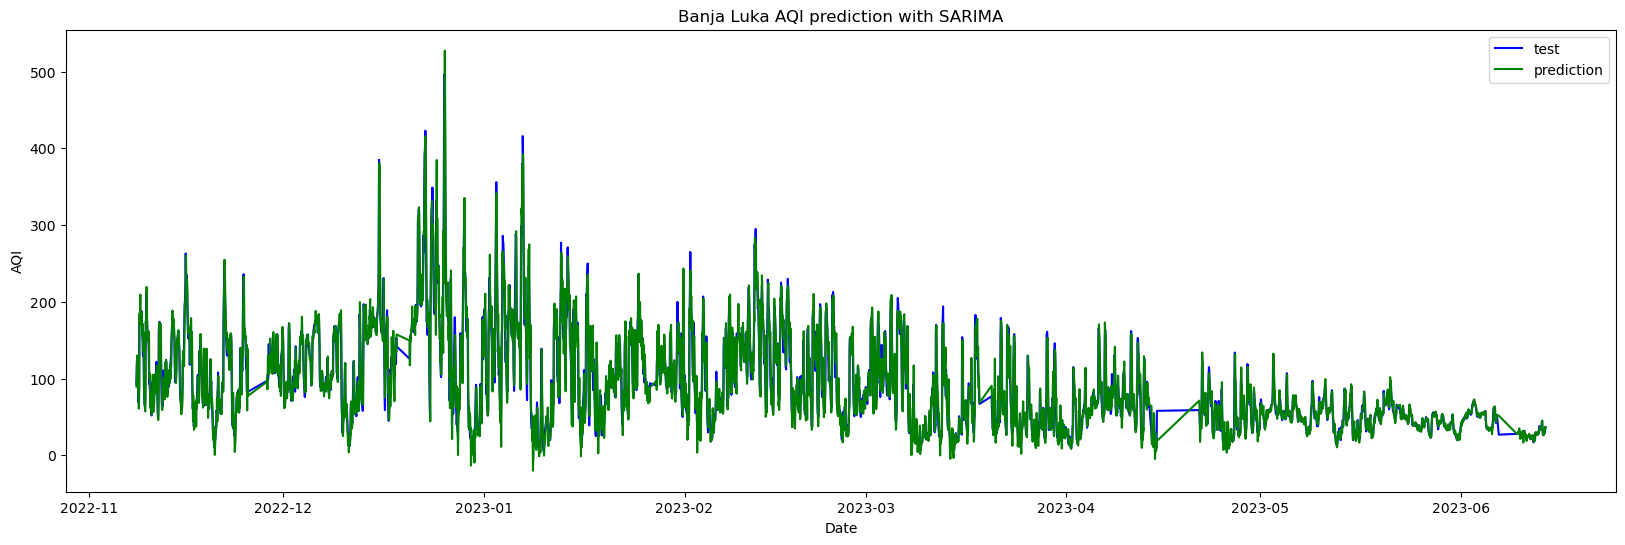

In [7]:
# plot forecasts against actual outcomes
from matplotlib import pyplot

pyplot.figure(figsize=(20,6))
pyplot.plot(test, color='blue', label='test')
pyplot.plot(test.index, predictions, color='green', label='prediction')
pyplot.legend()
pyplot.xlabel("Date")
pyplot.ylabel("AQI")
pyplot.title("Banja Luka AQI prediction with SARIMA")
pyplot.savefig('C:/Pythondatasets/SARIMA/SARIMA_Prediction_BanjaLuka.png')
pyplot.show()


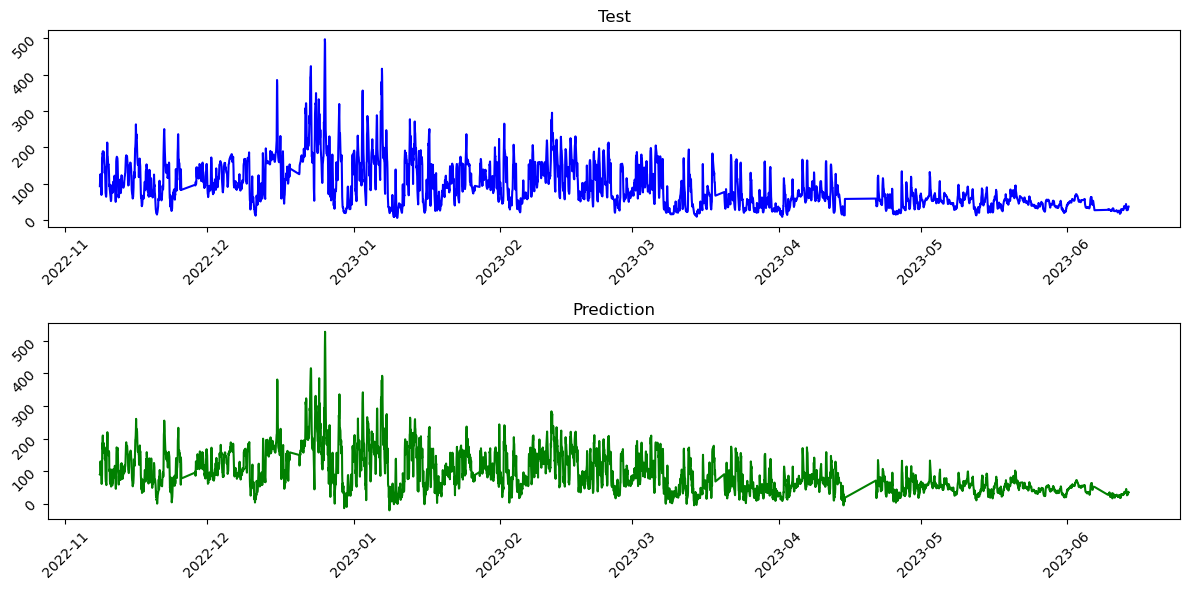

In [8]:
# Initialise the subplot function using number of rows and columns
test2=series[size:len(series)]
figure, axis = pyplot.subplots(2, 1, figsize=(12, 6))

# For Sine Function
axis[0].plot(test2, color='blue')
axis[0].set_title("Test")
axis[0].tick_params(labelrotation=45)

# For Tangent Function
axis[1].plot(test2.index, predictions, color='green')
axis[1].set_title("Prediction")
axis[1].tick_params(labelrotation=45)

figure.tight_layout()

pyplot.savefig('C:/Pythondatasets/SARIMA/SARIMA_Prediction_BanjaLuka_Dvije_sLike_final.png')
# Combine all the operations and display
pyplot.show()

In [9]:
res = pd.DataFrame(predictions)
res.index = test.index # its important for comparison
res.columns = ["AQI"]
res.to_csv("C:/Pythondatasets/SARIMA/Predictions_BanjaLuka_SARIMA.csv")

In [10]:
res = pd.DataFrame(test)
res.index = test.index # its important for comparison
res.columns = ["AQI"]
res.to_csv("C:/Pythondatasets/SARIMA/Test_BanjaLuka_SARIMA.csv")